<a href="https://colab.research.google.com/github/weswest/MSDS422/blob/main/MSDS_422_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Project Overview

This workbook focuses on the MNIST dataset ...

TKTKTK





# Workbook Structure

TKTKTK

## Considerations for analysis vs EDA

TKTKTK



## Overall layout

TKTKTK


# 0 Setup


## 0.1 Setup - Load Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import time

import string
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.cluster import MiniBatchKMeans
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.pipeline import make_pipeline

from sklearn import metrics

from xgboost import XGBClassifier


import xgboost as xgb
import lightgbm as lgb

## 0.2 Setup - Operating Environment
This code allows the Colab notebook to access my Google Drive files.

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
try:
  os.chdir("drive/My Drive/MSDS/422/MNIST")
except:
  pass

Mounted at /content/drive


## 0.3 Setup - Read in Data
Note: the Kaggle dataset already splits the housing data into "train" and "test" sets.  This assignment allows us to ignore the test set for now

In [4]:
df_train = pd.read_csv('Data/train.csv')
df_train.name = 'Training Set'
df_test = pd.read_csv('Data/test.csv')
df_test.name = 'Test Set'

In [5]:
dfs = [df_train, df_test]

for df in dfs:
  obs = df.shape[0]
  tot = df.shape[1]
  numeric = df.select_dtypes(include=np.number).shape[1]
  categorical = df.select_dtypes(exclude=np.number).shape[1]
  print('In {} we have {} observations, {} variables: {} numeric and {} categorical'.format(df.name, obs, tot, numeric, categorical))



In Training Set we have 42000 observations, 785 variables: 785 numeric and 0 categorical
In Test Set we have 28000 observations, 784 variables: 784 numeric and 0 categorical


In [6]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [7]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [8]:
df_train_original = df_train.copy()
df_test_original = df_test.copy()

# ntrain allows us to keep track of the length of the training set for later segmentation of train/test
ntrain = df_train.shape[0]

y_var = 'label'
y_train_original = df_train[y_var].values
y_train = y_train_original.copy()

df_train.drop([y_var], axis=1, inplace=True)
df_train = df_train.astype(float) / 255 # This converts all of the shadings from 0-255 --> 0-1
df_test = df_test.astype(float) / 255 # Same as above


In [9]:
df_all = pd.concat((df_train, df_test)).reset_index(drop=True)


def printsize(frame):
  print('Size of dataset: {} rows, {} columns'.format(frame.shape[0], frame.shape[1]))

printsize(df_train)
printsize(df_test)
printsize(df_all)

Size of dataset: 42000 rows, 784 columns
Size of dataset: 28000 rows, 784 columns
Size of dataset: 70000 rows, 784 columns


## 0.4 Set up dictionaries for later reference

In [10]:
# Build a dict for each model timeline run

times = {'RFC': 0, 'PCA_gen_all': 0, 'RFC_PCA_gen_all': 0, 'KNN': 0, 'PCA_gen_train': 0, 'RFC_PCA_gen_train': 0}

## 0.5 Look at the Data

### 0.5.1 Test Data

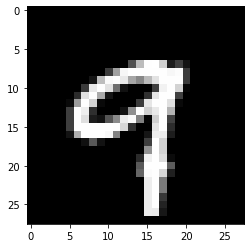

In [11]:
images = df_test.copy()
images *= 255
images = np.array(images, dtype='uint8')
images = images.reshape(len(df_test),28,28)

plt.imshow(images[20], cmap='gray')

# 1. Model 1: Build a Random Forest on Full Training Dataset

Note: we will just use the defaults for the hyperparameters

In [12]:
RFC = RandomForestClassifier()

start_time=time.time()
RFC_full_model = RFC.fit(df_train, y_train)
end_time=time.time()
delta = end_time - start_time

times['RFC'] = delta
print('Time elapsed: {:.1f} seconds'.format(delta))


Time elapsed: 31.0 seconds


# 2. Model 2: PCA on the full dataset and then build a classifier

Steps:
0. Combine train + test (happened up top)
1. Run PCA, identifying enough components to capture >95% of variability
2. Split out train vs test
3. Build the RFC on the adjusted train

## 2.1 Generate PCAs with >95% variability captured

### 2.1.1 Figure out the number of features to capture >95%

In [13]:
pca = PCA()
pca.fit(df_all)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print(d)

154


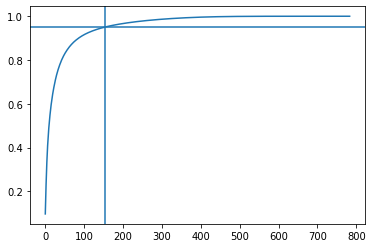

In [14]:
plt.plot(cumsum)
plt.axvline(x=d)
plt.axhline(y=0.95)

### 2.1.2 Apply the Right Number of PCAs to Dataset

In [15]:
pca = PCA(n_components=d) # Memo: defined above.  d = 154

start_time=time.time()

df_all_reduced = pca.fit_transform(df_all)

end_time=time.time()
delta = end_time - start_time


times['PCA_gen_all'] = delta
print('Time elapsed: {:.1f} seconds'.format(delta))

Time elapsed: 11.5 seconds


## 2.2 Split df_all_reduced into adjusted train vs test

In [16]:
df_all_red_train = df_all_reduced[:ntrain]
df_all_red_test = df_all_reduced[ntrain:]

obs_train = df_train.shape[0]
obs_all_red_train = df_all_red_train.shape[0]

obs_test = df_test.shape[0]
obs_all_red_test = df_all_red_test.shape[0]

#print(obs_train, obs_all_red_train)
#print(obs_test, obs_all_red_test)

print(df_train.shape, df_all_red_train.shape)
print(df_test.shape, df_all_red_test.shape)

(42000, 784) (42000, 154)
(28000, 784) (28000, 154)


## 2.3 Build the RFC with the reduced dataset

In [17]:
RFC = RandomForestClassifier()

start_time=time.time()
RFC_reduced_wrong_model = RFC.fit(df_all_red_train, y_train)
end_time=time.time()
delta = end_time - start_time

times['RFC_PCA_gen_all'] = delta
print('Time elapsed: {:.1f} seconds'.format(delta))

Time elapsed: 75.9 seconds


# 3. Build K Means Classifier

Note: the "k" = 10.

Relies heavily on the article shared as part of our homework, https://medium.datadriveninvestor.com/k-means-clustering-for-imagery-analysis-56c9976f16b6

In [18]:
df_t, df_v, y_t, y_v = train_test_split(df_train, y_train, test_size=0.33, random_state=42)

In [19]:
k = 10

kmeans = MiniBatchKMeans(n_clusters = k)

# Fit the model to the training data
start_time=time.time()

kmeans.fit(df_train)

end_time=time.time()
delta = end_time - start_time


times['KNN'] = delta
print('Time elapsed: {:.1f} seconds'.format(delta))


Time elapsed: 1.1 seconds


In [20]:
kmeans.labels_ # Note: read this that the first obs belongs to Cluster 2, etc.  It doesn't mean the first obs is the number 2

array([0, 3, 5, ..., 1, 9, 8], dtype=int32)

In [21]:
train_clusters = kmeans.predict(df_train)
test_clusters = kmeans.predict(df_test)

In [22]:
train_clusters

array([0, 3, 5, ..., 1, 9, 8], dtype=int32)

In [23]:
test_clusters

array([2, 3, 5, ..., 4, 8, 2], dtype=int32)

In [24]:
def infer_cluster_labels(kmeans, actual_labels):
  inferred_labels = {}

  for i in range(kmeans.n_clusters):

    # find index of points in cluster
    labels = []
    index = np.where(kmeans.labels_ == i)

    # append actual labels for each point in cluster
    labels.append(actual_labels[index])

    # determine most common label
    if len(labels[0]) == 1:
        counts = np.bincount(labels[0])
    else:
        counts = np.bincount(np.squeeze(labels))

    # assign the cluster to a value in the inferred_labels dictionary
    if np.argmax(counts) in inferred_labels:
        # append the new number to the existing array at this slot
        inferred_labels[np.argmax(counts)].append(i)
    else:
        # create a new array in this slot
        inferred_labels[np.argmax(counts)] = [i]

    #print(labels)
    #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
    
  return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
  # empty array of len(X)
  predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

  for i, cluster in enumerate(X_labels):
      for key, value in cluster_labels.items():
          if cluster in value:
              predicted_labels[i] = key
              
  return predicted_labels


In [25]:

# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(kmeans, y_train)
kmeans_train_labels = infer_data_labels(train_clusters, cluster_labels)
print (kmeans_train_labels[:20])
print (y_train[:20])

[1 0 1 2 0 4 7 3 3 3 8 7 1 3 3 1 3 0 7 2]
[1 0 1 4 0 0 7 3 5 3 8 9 1 3 3 1 2 0 7 5]


In [26]:
kmeans_test_labels = infer_data_labels(test_clusters, cluster_labels)


In [27]:
print(kmeans_test_labels[:20])

[2 0 1 7 3 7 0 3 0 3 3 7 4 0 4 0 3 1 4 0]


In [28]:
print(df_test.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  \
0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  \
0  

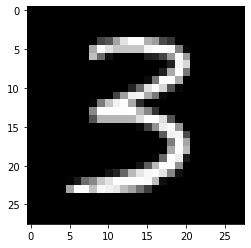

In [29]:
images = df_test.copy()
images *= 255
images = np.array(images, dtype='uint8')
images = images.reshape(len(df_test),28,28)

plt.imshow(images[9], cmap='gray')

# 4. Model 4: PCA on the train dataset and then build a classifier

Steps:

1. Run PCA, identifying enough components to capture >95% of variability
2. Apply PCA from train to test set
3. Build the RFC on the adjusted train

Note: Step 0 above (combine test and train) was purposefully wrong.  The approach below corrects that error.

## 4.1 Generate PCAs with >95% variability captured

### 4.1.1 Figure out the number of features to capture >95%

In [30]:
pca = PCA()
pca.fit(df_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print(d)

154


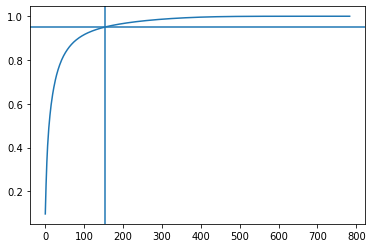

In [31]:
plt.plot(cumsum)
plt.axvline(x=d)
plt.axhline(y=0.95)

### 4.1.2 Apply the Right Number of PCAs to Dataset

In [32]:
pca = PCA(n_components=d) # Memo: defined above.  d = 154

start_time=time.time()

df_train_reduced = pca.fit_transform(df_train)

end_time=time.time()
delta = end_time - start_time


times['PCA_gen_train'] = delta
print('Time elapsed: {:.1f} seconds'.format(delta))

Time elapsed: 6.6 seconds


## 4.2 Apply PCA from train to test set

In [33]:
df_test_reduced = pca.transform(df_test)

obs_train = df_train.shape[0]
obs_all_red_train = df_train_reduced.shape[0]

obs_test = df_test.shape[0]
obs_all_red_test = df_test_reduced.shape[0]

print(df_train.shape, df_train_reduced.shape)
print(df_test.shape, df_test_reduced.shape)

(42000, 784) (42000, 154)
(28000, 784) (28000, 154)


## 4.3 Build the RFC with the reduced dataset

In [34]:
RFC = RandomForestClassifier()

start_time=time.time()
RFC_reduced_model = RFC.fit(df_train_reduced, y_train)
end_time=time.time()
delta = end_time - start_time

times['RFC_PCA_gen_train'] = delta
print('Time elapsed: {:.1f} seconds'.format(delta))

Time elapsed: 77.1 seconds


# 5. Forecast on Test Data

In [35]:
# Memo: Models are:

#RFC_full_model = RFC.fit(df_train, y_train)  # Note: this was generated up top
#RFC_reduced_wrong_model

RFC_full_test_pred = RFC_full_model.predict(df_test)
RFC_full_test_prob = RFC_full_model.predict_proba(df_test)
RFC_full_test_prob = RFC_full_test_prob[:, 1]


RFC_reduced_wrong_test_pred = RFC_reduced_wrong_model.predict(df_all_red_test)
RFC_reduced_wrong_test_prob = RFC_reduced_wrong_model.predict_proba(df_all_red_test)
RFC_reduced_wrong_test_prob = RFC_reduced_wrong_test_prob[:, 1]

kmeans_test_pred = kmeans_test_labels

RFC_reduced_test_pred = RFC_reduced_model.predict(df_test_reduced)
RFC_reduced_test_prob = RFC_reduced_model.predict_proba(df_test_reduced)
RFC_reduced_test_prob = RFC_reduced_test_prob[:, 1]


In [36]:
RFC_full_test_pred

array([2, 0, 9, ..., 3, 9, 2])

In [37]:
kmeans_test_pred

array([2, 0, 1, ..., 3, 4, 2], dtype=uint8)

In [38]:

#result=np.argmax(RFC_full_test_pred,axis=1)
result = RFC_full_test_pred
result_CSV=pd.DataFrame({'ImageId':range(1,len(result)+1),'Label':result})
result_CSV=result_CSV.set_index('ImageId')
#result_CSV.to_csv('subWk6RFCFull.csv')
#result_CSV

In [39]:

#result=np.argmax(RFC_full_test_pred,axis=1)
result = RFC_reduced_wrong_test_pred
result_CSV=pd.DataFrame({'ImageId':range(1,len(result)+1),'Label':result})
result_CSV=result_CSV.set_index('ImageId')
#result_CSV.to_csv('subWk6RFCPCAall.csv')
#result_CSV

In [40]:

#result=np.argmax(RFC_full_test_pred,axis=1)
result = RFC_reduced_test_pred
result_CSV=pd.DataFrame({'ImageId':range(1,len(result)+1),'Label':result})
result_CSV=result_CSV.set_index('ImageId')
#result_CSV.to_csv('subWk6RFCPCA.csv')
#result_CSV

In [41]:

#result=np.argmax(RFC_full_test_pred,axis=1)
result = kmeans_test_pred
result_CSV=pd.DataFrame({'ImageId':range(1,len(result)+1),'Label':result})
result_CSV=result_CSV.set_index('ImageId')
result_CSV.to_csv('subWk6kmeans.csv')
result_CSV

,Label
ImageId,
1,2
2,0
3,1
4,7
5,3
...,...
27996,4
27997,4
27998,3


# 6. Get key summary statistics

In [42]:
print(times)

{'RFC': 30.989168643951416, 'PCA_gen_all': 11.50489330291748, 'RFC_PCA_gen_all': 75.87185096740723, 'KNN': 1.0841152667999268, 'PCA_gen_train': 6.577152252197266, 'RFC_PCA_gen_train': 77.13630652427673}
